<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.formula.api as smf

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)
df= boston_df.copy()

#### Add your code below following the instructions given in the course to complete the peer graded assignment


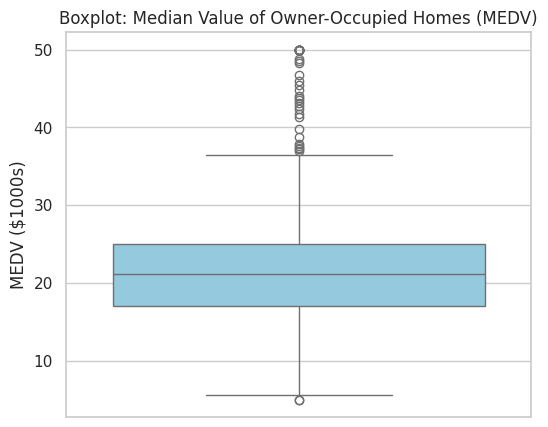

In [19]:

# Set seaborn style
sns.set(style="whitegrid")


#Task 2 = Generate Descriptive Staistics and Visualisations

#1) Boxplot: MEDIAN VALUE of owner-occupied homes (MEDV)
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["MEDV"], color="skyblue")
plt.title("Boxplot: Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV ($1000s)")
plt.show()

# Findings for Q1
medv_median = df["MEDV"].median()
medv_q1 = df["MEDV"].quantile(0.25)
medv_q3 = df["MEDV"].quantile(0.75)
medv_min = df["MEDV"].min()
medv_max = df["MEDV"].max()



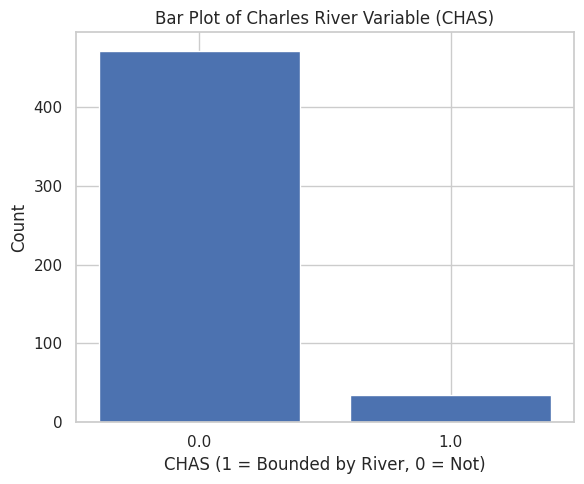

In [25]:
# 2) Bar plot for CHAS (Charles River variable)

chas_counts = boston_df["CHAS"].value_counts().sort_index()  # ensure 0 then 1
plt.figure(figsize=(6,5))
plt.bar(chas_counts.index.astype(str), chas_counts.values)
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("CHAS (1 = Bounded by River, 0 = Not)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

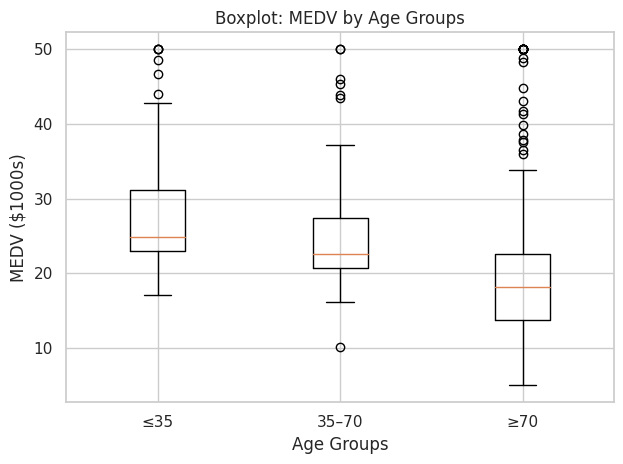

In [32]:
# 3) Boxplot of MEDV vs AGE groups 
# Create three groups for age: ≤35, 35–70, >70
age_bins = [0, 35, 70, 100]
age_labels = ["≤35", "35–70", "≥70"]
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels, include_lowest=True)

plt.figure()
group_data = [df.loc[df["AGE_GROUP"] == label, "MEDV"].dropna() for label in age_labels]
plt.boxplot(group_data, labels=age_labels)
plt.title("Boxplot: MEDV by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("MEDV ($1000s)")
plt.tight_layout()
plt.show()


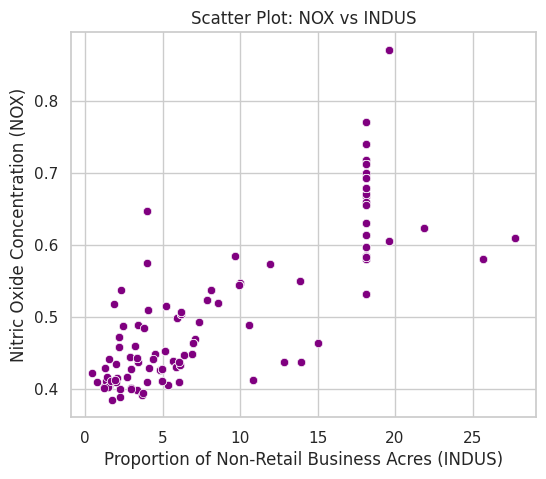

In [22]:
# 4) Scatter plot: NOX vs INDUS 
plt.figure(figsize=(6, 5))
sns.scatterplot(x="INDUS", y="NOX", data=df, color="purple")
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

# Findings for Q4
nox_indus_corr = df["NOX"].corr(df["INDUS"])

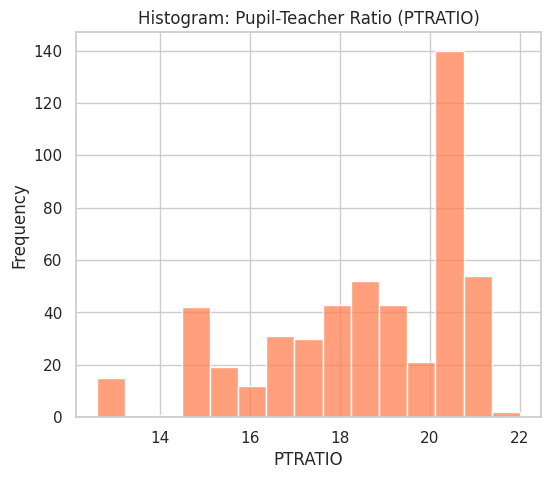

In [23]:
# 5)Histogram for PTRATIO 
plt.figure(figsize=(6, 5))
sns.histplot(df["PTRATIO"], bins=15, kde=False, color="coral")
plt.title("Histogram: Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

# Findings for Q5
ptratio_median = df["PTRATIO"].median()

In [36]:
# Task 3) statistical tests, where a=0.05
alpha = 0.05

#1) T-Test — MEDV by Charles River (CHAS)
from scipy import stats
alpha = 0.05

# Split data into two groups based on CHAS
medv_chas_0 = df[df["CHAS"] == 0]["MEDV"]
medv_chas_1 = df[df["CHAS"] == 1]["MEDV"]

print("T-Test: Difference in MEDV by CHAS")
print("H0: No significant difference in MEDV between CHAS=0 and CHAS=1")
print("H1: Significant difference in MEDV between CHAS=0 and CHAS=1")

# Independent samples T-test
t_stat, p_val = stats.ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)

print(f"T-statistic = {t_stat:.4f}, P-value = {p_val:.4f}")

if p_val < alpha:
    print("Conclusion: Reject H0 → Significant difference in MEDV based on CHAS\n")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in MEDV based on CHAS\n")




T-Test: Difference in MEDV by CHAS
H0: No significant difference in MEDV between CHAS=0 and CHAS=1
H1: Significant difference in MEDV between CHAS=0 and CHAS=1
T-statistic = -3.1133, P-value = 0.0036
Conclusion: Reject H0 → Significant difference in MEDV based on CHAS



In [41]:
#2) ANOVA — MEDV Across AGE Groups

from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create AGE groups
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=[0, 35, 70, 100],
                         labels=["≤35", "35-70", "≥70"], include_lowest=True)

alpha = 0.05

print("ANOVA: MEDV Across AGE Groups")
print("H0: No difference in mean MEDV among AGE groups")
print("H1: At least one AGE group has a different mean MEDV")

# Perform ANOVA
model = ols("MEDV ~ C(AGE_GROUP)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n=== ANOVA Table ===")
print(anova_table)

# Use iloc to avoid FutureWarning
p_value = anova_table["PR(>F)"].iloc[0]

if p_value < alpha:
    print("Conclusion: Reject H0 → Significant difference in MEDV among AGE groups\n")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in MEDV among AGE groups\n")


ANOVA: MEDV Across AGE Groups
H0: No difference in mean MEDV among AGE groups
H1: At least one AGE group has a different mean MEDV

=== ANOVA Table ===
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: Reject H0 → Significant difference in MEDV among AGE groups



In [45]:
#3) Pearson Correlation — NOX vs INDUS
print("Pearson Correlation: NOX vs INDUS")
print("H0: No linear relationship between NOX and INDUS")
print("H1: Significant linear relationship between NOX and INDUS")

# Perform Pearson correlation
corr_coef, p_val = stats.pearsonr(df["NOX"], df["INDUS"])

print(f"Correlation Coefficient = {corr_coef:.4f}, P-value = {p_val:.4f}")

if p_val < alpha:
    print("Conclusion: Reject H0 → Significant relationship between NOX and INDUS\n")
else:
    print("Conclusion: Fail to reject H0 → No significant relationship between NOX and INDUS\n")



Pearson Correlation: NOX vs INDUS
H0: No linear relationship between NOX and INDUS
H1: Significant linear relationship between NOX and INDUS
Correlation Coefficient = 0.7637, P-value = 0.0000
Conclusion: Reject H0 → Significant relationship between NOX and INDUS



In [44]:
#4) Regression — DIS vs MEDV
import statsmodels.api as sm

print("Regression: Effect of DIS on MEDV")
print("H0: DIS has no impact on MEDV")
print("H1: DIS has a significant impact on MEDV")

# Define variables
X = sm.add_constant(df["DIS"])  # add intercept
y = df["MEDV"]

# Fit regression model
model = sm.OLS(y, X).fit()

print(model.summary())

p_value = model.pvalues["DIS"]
coef = model.params["DIS"]

if p_value < alpha:
    print(f"Conclusion: Reject H0 → DIS significantly impacts MEDV")
    if coef > 0:
        print(f"Interpretation: For each unit increase in DIS, MEDV increases by {coef:.2f} ($1000s)\n")
    else:
        print(f"Interpretation: For each unit increase in DIS, MEDV decreases by {coef:.2f} ($1000s)\n")
else:
    print("Conclusion: Fail to reject H0 → DIS has no significant impact on MEDV\n")



Regression: Effect of DIS on MEDV
H0: DIS has no impact on MEDV
H1: DIS has a significant impact on MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        17:42:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------